#Model Selection for Bitcoin Price Prediction



##**Import prepared dataset**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt

In [ ]:
!wget https://github.com/AndresLDF/ML-Zoomcamp-Capstone2-BitCoinPricePrediction/raw/main/Datasets/BCP_extended_dataframe.csv


--2024-01-22 14:17:22--  https://github.com/AndresLDF/ML-Zoomcamp-Capstone2-BitCoinPricePrediction/raw/main/Datasets/BCP_extended_dataframe.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AndresLDF/ML-Zoomcamp-Capstone2-BitCoinPricePrediction/main/Datasets/BCP_extended_dataframe.csv [following]
--2024-01-22 14:17:22--  https://raw.githubusercontent.com/AndresLDF/ML-Zoomcamp-Capstone2-BitCoinPricePrediction/main/Datasets/BCP_extended_dataframe.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 218589 (213K) [text/plain]
Saving to: ‘BCP_extended_dataframe.csv’

BCP_extended_datafr 100%[======

In [ ]:
df = pd.read_csv("BCP_extended_dataframe.csv")

In [ ]:
df.head(10)

,unix,open,volume_btc,volume_eur,7_days_a,30_days_a,90_days_a,next_day_value,next_week_value
0,1472947200,532.05,83410.07,154.84,0.12,-0.69,-1.06,539.0,548.0
1,1473033600,537.83,194358.24,362.37,1.85,-0.57,-1.13,541.0,543.0
2,1473120000,539.26,204407.28,377.54,3.84,-0.40,-1.19,545.0,543.0
3,1473206400,542.80,193789.48,356.05,5.10,-0.17,-1.25,552.0,543.0
4,1473292800,547.69,234580.43,422.91,6.09,0.11,-1.31,556.0,543.0
5,1473379200,555.39,148756.15,269.02,6.47,0.42,-1.37,556.0,544.0
6,1473465600,555.00,60643.39,109.01,5.83,0.70,-1.42,548.0,544.0
7,1473552000,556.73,204111.54,374.00,4.01,0.99,-1.44,543.0,545.0
8,1473638400,541.98,179642.86,332.38,3.60,1.26,-1.43,543.0,545.0
9,1473724800,543.23,184808.74,340.59,1.55,1.42,-1.41,543.0,543.0


## **Decission Tree Regressor for prediction and set of Evaluation Parameters**

### First Calculation for the DTR with default parameters

In [ ]:
dfX = df.iloc[:,:-2]
dfy = df.iloc[:,-2:]

In [ ]:
dfX_fulltrain, dfX_test, dfy_fulltrain, dfy_test  = train_test_split(dfX, dfy, test_size=0.2, random_state= 4)
dfX_train, dfX_eval, dfy_train, dfy_eval = train_test_split(dfX_fulltrain, dfy_fulltrain, test_size=0.25, random_state= 4)
dfX_fulltrain = dfX_fulltrain.reset_index(drop = True)
dfX_test = dfX_test.reset_index(drop = True)
dfy_fulltrain = dfX_fulltrain.reset_index(drop = True)
dfy_test = dfy_test.reset_index(drop = True)
dfX_train = dfX_train.reset_index(drop = True)
dfX_eval = dfX_eval.reset_index(drop = True)
dfy_train = dfy_train.reset_index(drop = True)
dfy_eval = dfy_eval.reset_index(drop = True)

dfX_test.shape, dfy_test.shape, dfX_train.shape, dfy_train.shape, dfX_eval.shape, dfy_eval.shape

((534, 7), (534, 2), (1600, 7), (1600, 2), (534, 7), (534, 2))

In [ ]:
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(dfX_train, dfy_train)
y_eval_pred = dt_regressor.predict(dfX_eval)

rsme = mean_squared_error(dfy_eval, y_eval_pred, squared=False)
print(f"Root Mean Squared Error: {rsme}")

Root Mean Squared Error: 1325.9585244087841


In [ ]:
 dt_regressor.get_depth()

25

In [ ]:
y_eval_pred

array([[ 9271.,  9237.],
       [27594., 29527.],
       [28270., 32182.],
       ...,
       [48617., 44004.],
       [15776., 15822.],
       [ 5562.,  5468.]])

### Visualization and evaluation of the DRT first calculation

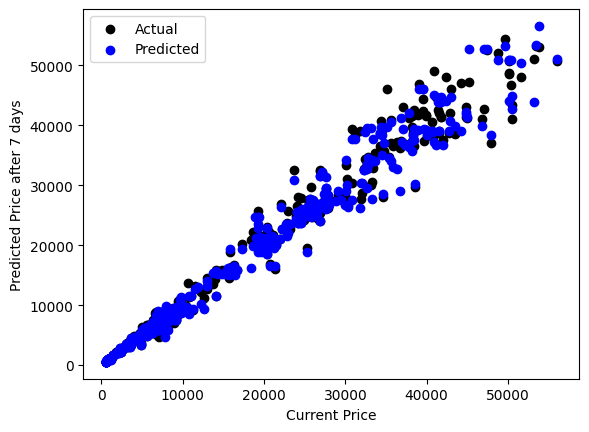

In [ ]:
plt.scatter(dfX_eval['open'], dfy_eval["next_week_value"], color='black', label='Actual')
plt.scatter(dfX_eval['open'], y_eval_pred[:,1], color='blue', label='Predicted')
plt.xlabel('Current Price')
plt.ylabel('Predicted Price after 7 days')
plt.legend()
plt.show()

To have a beter view on the results and how good they are, We are going to calculat the porcentual error respect to the final value. In this case the porcentual error is a good indicator as we are not expecting to be able to fully predict the price, but to be in a  acceptable range

In [ ]:
individual_errors = (dfy_eval["next_week_value"] - y_eval_pred[:,1])/dfy_eval["next_week_value"]*100
individual_errors

0      -6.368033
1      -2.577731
2       0.080725
3      -0.500000
4       0.466490
         ...    
529    -7.474662
530     8.502894
531     9.350473
532    -0.291582
533    17.848558
Name: next_week_value, Length: 534, dtype: float64

In [ ]:
individual_errors_df = individual_errors.to_frame()
individual_errors_df = individual_errors_df.rename(columns={individual_errors_df.columns[0]: 'errors'})


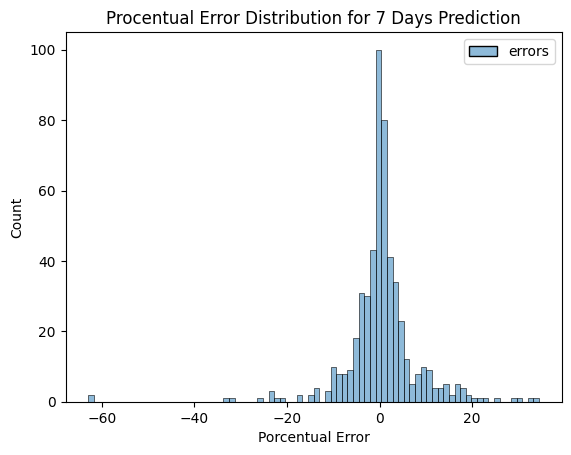

In [ ]:
sns.histplot(data=individual_errors_df)
plt.xlabel("Porcentual Error")
plt.title("Procentual Error Distribution for 7 Days Prediction")
plt.show()

To have a better idea of how good is the model, I will make set the maximum acceptable error as 3%. All values above it will not be considered acceptable predictions, The ration of acceptable predictions against unacceptable predictions will be used to do the final evaluation of the model and comparate models.
This 3% value was not set based on any fundamented empirical evidence, but was determined subjectively, guided by personal considerations

In [ ]:
acceptabe_predictins_7d = (np.abs(individual_errors)<=3).sum()
acceptabe_predictins_7d

295

In [ ]:
moderate_unacceptable_predictins_7d=(np.abs(individual_errors)>3).sum() - (np.abs(individual_errors)>5).sum()
moderate_unacceptable_predictins_7d

92

In [ ]:
highly_unacceptable_predictions_7d=(np.abs(individual_errors)>=5).sum() - (np.abs(individual_errors)>20).sum()
highly_unacceptable_predictions_7d

130

In [ ]:
blatant_unacceptable_predictions_7d = (np.abs(individual_errors)>20).sum()
blatant_unacceptable_predictions_7d

17

In [ ]:
total_unacceptable_predictions = (np.abs(individual_errors)>3).sum()
total_unacceptable_predictions

239

In [ ]:
acceptable_ratio = acceptabe_predictins_7d/(total_unacceptable_predictions+acceptabe_predictins_7d)
acceptable_ratio

0.552434456928839

The model was slighly better than tossing a coin when we make this analysis. But to be more realistics on the evaluation, we should set a punishment mechanism for values with bigger errors in the evaluation, as the error pocentage in a real wold application, I would like to have an indicator tha ttakes into account how bad is the error, so a weigthed ratio with the following weigth will be used to count the unacceptable values:

* moderate_unacceptable_predictins_7d: 1
* highly_unacceptable_predictions_7d: 2
* blatant_unacceptable_predictions_7d: 4

With this weitghs, a new ratio will be calculated to compare models.



In [ ]:
acceptable_weighted_ratio = acceptabe_predictins_7d/(moderate_unacceptable_predictins_7d+(highly_unacceptable_predictions_7d*2)+(blatant_unacceptable_predictions_7d*4)+acceptabe_predictins_7d)
acceptable_weighted_ratio

0.4125874125874126

### Set Evaluation Function for future model evaluations

In [ ]:
def model_evaluator(dfy_eval, y_eval_pred, result_indentificator_string, aceptable_error=3):
  if result_indentificator_string == "next_week_value":
    individual_errors = (dfy_eval[result_indentificator_string] - y_eval_pred[:,1])/dfy_eval[result_indentificator_string]*100
  elif result_indentificator_string == "next_day_value":
    individual_errors = (dfy_eval[result_indentificator_string] - y_eval_pred[:,0])/dfy_eval[result_indentificator_string]*100
  elif result_indentificator_string == "one_value":
    individual_errors = (dfy_eval - y_eval_pred)/dfy_eval*100
  else:
    raise ValueError("Please enter a valid value for the argument result_indentificator_string")
  acceptabe_predictins_7d = (np.abs(individual_errors)<=aceptable_error).sum()
  moderate_unacceptable_predictins_7d=(np.abs(individual_errors)>aceptable_error).sum() - (np.abs(individual_errors)>(aceptable_error*5/3)).sum()
  highly_unacceptable_predictions_7d=(np.abs(individual_errors)>=(aceptable_error*5/3)).sum() - (np.abs(individual_errors)>20).sum()
  blatant_unacceptable_predictions_7d = (np.abs(individual_errors)>20).sum()
  total_unacceptable_predictions = (np.abs(individual_errors)>aceptable_error).sum()
  acceptable_ratio = acceptabe_predictins_7d/(total_unacceptable_predictions+acceptabe_predictins_7d)
  acceptable_ratio = np.round(acceptable_ratio,2)
  acceptable_weighted_ratio = acceptabe_predictins_7d/(moderate_unacceptable_predictins_7d+(highly_unacceptable_predictions_7d*2)+(blatant_unacceptable_predictions_7d*4)+acceptabe_predictins_7d)
  acceptable_weighted_ratio = np.round(acceptable_weighted_ratio,2)
  #print(f"The Acceptable Ratio (accuracy) is {acceptable_ratio}")
  #print(f"the Weighted Ratio is {acceptable_weighted_ratio}")
  return individual_errors, acceptable_ratio, acceptable_weighted_ratio








In [ ]:
#Evaluation for the predictions after 7 days with an error of 1.5%
print ("1 Day Prediction:")
errors_1d, acceptable_ratio_1d, acceptable_weighted_ratio_1d = model_evaluator(dfy_eval, y_eval_pred, "next_day_value", aceptable_error=1.5)

1 Day Prediction:


In [ ]:
#Evaluation for the predictions after 7 days with an error of 3%
print ("7 Days Prediction:")
errors_7d, acceptable_ratio_7d, acceptable_weighted_ratio_7d = model_evaluator(dfy_eval, y_eval_pred, "next_week_value", aceptable_error=3)

7 Days Prediction:


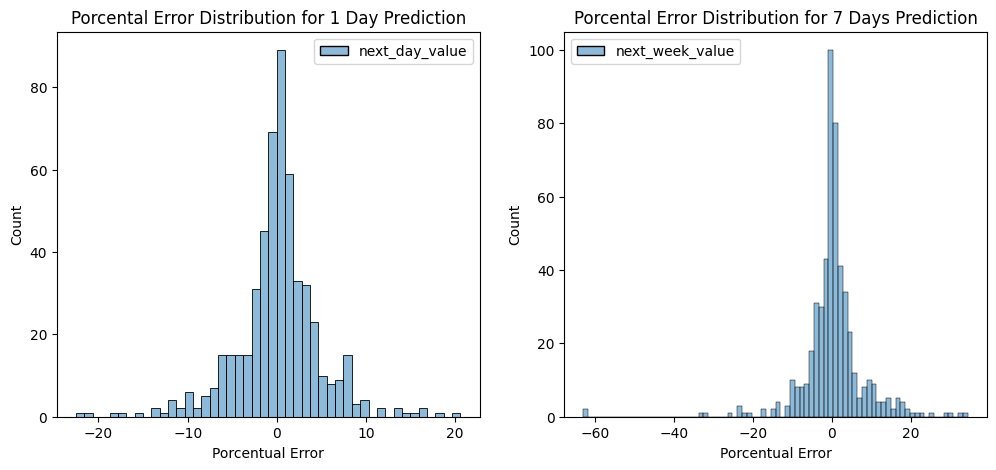

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
individual_errors_1d = errors_1d.to_frame()
individual_errors_1d = individual_errors_1d.rename(columns={individual_errors_df.columns[0]: 'errors'})
sns.histplot(data=individual_errors_1d, ax=axes[0])
axes[0].set_xlabel("Porcentual Error")
axes[0].set_title("Porcental Error Distribution for 1 Day Prediction")

individual_errors_7d = errors_7d.to_frame()
individual_errors_7d = individual_errors_7d.rename(columns={individual_errors_df.columns[0]: 'errors'})
sns.histplot(data=individual_errors_7d, ax=axes[1])
axes[1].set_xlabel("Porcentual Error")
axes[1].set_title("Porcental Error Distribution for 7 Days Prediction")

plt.show()

In [ ]:
#To store the results for each model, I will use a dataframe call models_results
model_results_columns = ["model_tested","rsme", "acceptable_weighted_ratio_1d", "acceptable_weighted_ratio_7d"]
models_results = pd.DataFrame(columns=model_results_columns)

### Optimization of Regrssion Tree

CHECK ON KFOLD EFFECT ON TRAINING

The first try will be using KFold to train the model

> Indented block



In [ ]:
dt_regressor = DecisionTreeRegressor()
n_splits = 5
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
# Perform k-fold cross-validation
for train_index, test_index in kfold.split(dfX_train, dfy_train):
    X_train_fold, X_test_fold = dfX_train.iloc[train_index], dfX_train.iloc[test_index]
    y_train_fold, y_test_fold = dfy_train.iloc[train_index], dfy_train.iloc[test_index]

    # Fit the model on the training fold
    dt_regressor.fit(X_train_fold, y_train_fold)

    # Make predictions on the test fold
    y_test_pred_fold = dt_regressor.predict(X_test_fold)

    # Calculate and print the RMSE for each fold
    rmse_fold = np.sqrt(mean_squared_error(y_test_fold, y_test_pred_fold))
    print(f"RMSE for Fold: {rmse_fold}")



RMSE for Fold: 1306.3522232728815
RMSE for Fold: 1599.6218708455758
RMSE for Fold: 1296.9375978868452
RMSE for Fold: 1715.8211832275822
RMSE for Fold: 1363.4626988847183


In [ ]:
y_test_pred = dt_regressor.predict(dfX_test)

rsme = mean_squared_error(dfy_test, y_test_pred, squared=False)
print(f"Root Mean Squared Error: {rsme}")

Root Mean Squared Error: 1456.701089218783


In [ ]:
print ("1 Day Prediction:")
errors_1d, acceptable_ratio_1d, acceptable_weighted_ratio_1d = model_evaluator(dfy_test, y_test_pred, "next_day_value", aceptable_error=1.5)
print ("7 Days Prediction:")
errors_7d, acceptable_ratio_7d, acceptable_weighted_ratio_7d = model_evaluator(dfy_test, y_test_pred, "next_week_value", aceptable_error=3)

1 Day Prediction:
7 Days Prediction:


The results using KFold were lower than the ones using the whole train data set for training. In this case I will not use kFold for training

DEFINE TRAINING FUNTION

In [ ]:
def Regressor_tree_trainer(X_train, y_train, max_depth, min_samples_leaf):
  dt_regressor = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
  dt_regressor.fit(X_train_fold, y_train_fold)
  return dt_regressor

In [ ]:
deeps=[5,10,15,20,25,30,40,50,70,100]
samples_leaf=[3,5,7,10,15,20,30,40,50]
result_columns = ["max_depth", "min_samples_leaf","rsme", "acceptable_ratio_1d", "acceptable_weighted_ratio_1d", "acceptable_ratio_7d", "acceptable_weighted_ratio_7d" ]
results = pd.DataFrame(columns=result_columns)

for max_depth in deeps:
  for min_samples_leaf in samples_leaf:
    model = Regressor_tree_trainer(dfX_train, dfy_train, max_depth, min_samples_leaf)

    y_eval_pred = model.predict(dfX_eval)
    rsme = mean_squared_error(dfy_eval, y_eval_pred, squared=False)

    #print (f"For a max_depth of {max_depth} and a min_samples_leaf of {min_samples_leaf}, the 1 Day Prediction Ratios are:")
    errors_1d, acceptable_ratio_1d, acceptable_weighted_ratio_1d = model_evaluator(dfy_eval, y_eval_pred, "next_day_value", aceptable_error=1.5)
    #print (f"For a max_depth of {max_depth} and a min_samples_leaf of {min_samples_leaf}, the 7 Day Prediction Ratios are:")
    errors_7d, acceptable_ratio_7d, acceptable_weighted_ratio_7d = model_evaluator(dfy_eval, y_eval_pred, "next_week_value", aceptable_error=3)

    new_row = [max_depth , min_samples_leaf, rsme, acceptable_ratio_1d, acceptable_weighted_ratio_1d, acceptable_ratio_7d, acceptable_weighted_ratio_7d]
    new_row_df = pd.DataFrame([new_row], columns=results.columns)

    results = pd.concat([results, new_row_df], ignore_index=True)


In [ ]:
results

,max_depth,min_samples_leaf,rsme,acceptable_ratio_1d,acceptable_weighted_ratio_1d,acceptable_ratio_7d,acceptable_weighted_ratio_7d
0,5,3,1542.058951,0.19,0.11,0.31,0.18
1,5,5,1535.350320,0.19,0.11,0.31,0.18
2,5,7,1536.641849,0.19,0.11,0.31,0.18
3,5,10,1544.196350,0.19,0.11,0.31,0.18
4,5,15,1483.038995,0.22,0.12,0.31,0.18
...,...,...,...,...,...,...,...
85,100,15,1428.374040,0.26,0.16,0.35,0.22
86,100,20,1502.431634,0.27,0.17,0.33,0.20
87,100,30,1551.146655,0.23,0.14,0.28,0.16
88,100,40,1699.675783,0.23,0.14,0.28,0.16


<ipython-input-32-aafbcbda2f1c>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")
<ipython-input-32-aafbcbda2f1c>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")
<ipython-input-32-aafbcbda2f1c>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")


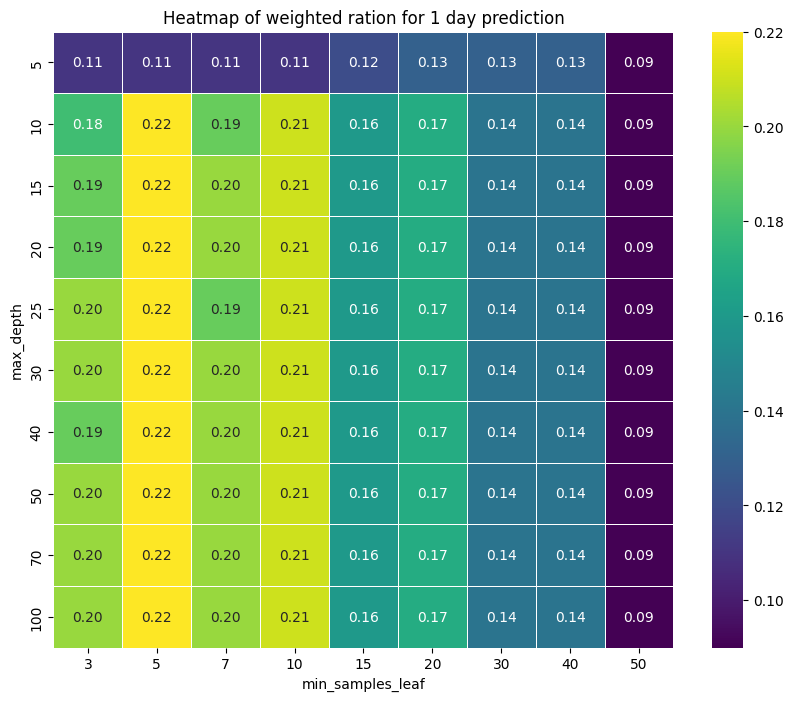

In [ ]:
# Pivot the DataFrame for heatmap
heatmap_data = results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
plt.title("Heatmap of weighted ration for 1 day prediction")
plt.show()

<ipython-input-33-304b98230ec0>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")
<ipython-input-33-304b98230ec0>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")
<ipython-input-33-304b98230ec0>:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")


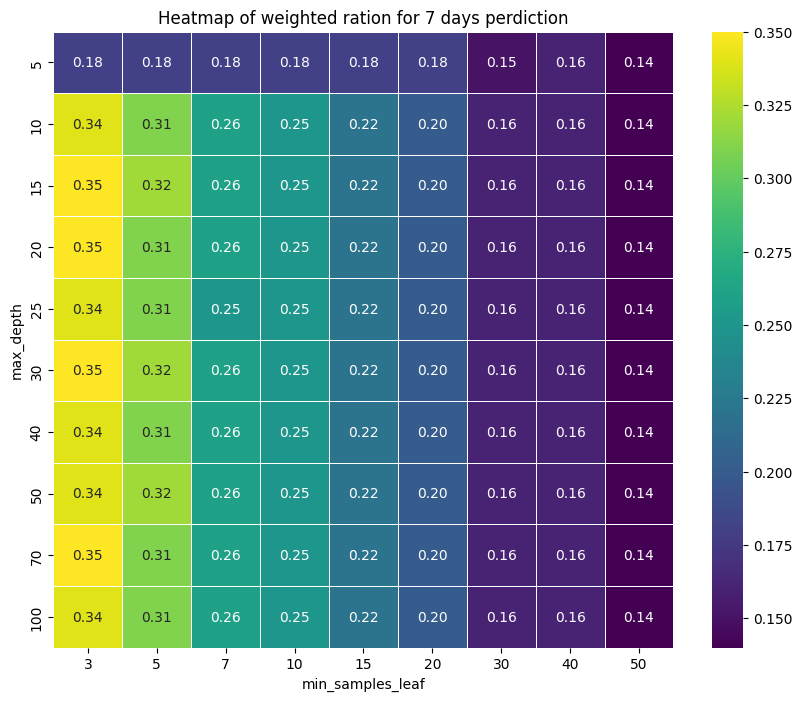

In [ ]:
# Pivot the DataFrame for heatmap
heatmap_data = results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
plt.title("Heatmap of weighted ration for 7 days perdiction")
plt.show()

In [ ]:
best_results = results.loc[(results['max_depth']==30) & (results['min_samples_leaf']==3)]
best_results

,max_depth,min_samples_leaf,rsme,acceptable_ratio_1d,acceptable_weighted_ratio_1d,acceptable_ratio_7d,acceptable_weighted_ratio_7d
45,30,3,1424.267595,0.3,0.2,0.49,0.35


In [ ]:
new_row = {"model_tested": "Regression Tree", "rsme": best_results["rsme"].values[0], "acceptable_weighted_ratio_1d": best_results["acceptable_weighted_ratio_1d"].values[0],"acceptable_weighted_ratio_7d": best_results["acceptable_weighted_ratio_7d"].values[0] }
new_row_df = pd.DataFrame([new_row], columns=models_results.columns)

models_results = pd.concat([models_results, new_row_df], ignore_index=True)

## Random Regression Forest *Evaluation*

In [ ]:
def regressor_forest_trainer(X_train, y_train, max_depth, min_samples_leaf,n_estimators=100):
  rf_regressor = RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state = 42)
  rf_regressor.fit(X_train_fold, y_train_fold)
  return rf_regressor

In [ ]:
estimators = [25, 50, 75, 100, 200, 400]
deeps=[5,10,15,20,25,30,40,50,70,100]
samples_leaf=[3,5,7,10,15,20,30,40,50]
result_columns = ["n_estimators", "max_depth", "min_samples_leaf","rsme", "acceptable_ratio_1d", "acceptable_weighted_ratio_1d", "acceptable_ratio_7d", "acceptable_weighted_ratio_7d" ]
results = pd.DataFrame(columns=result_columns)
for n_estimators in estimators:
  for max_depth in deeps:
    for min_samples_leaf in samples_leaf:
      model = regressor_forest_trainer(dfX_train, dfy_train, max_depth, min_samples_leaf, n_estimators)

      y_eval_pred = model.predict(dfX_eval)
      rsme = mean_squared_error(dfy_eval, y_eval_pred, squared=False)

      #print (f"For a max_depth of {max_depth} and a min_samples_leaf of {min_samples_leaf}, the 1 Day Prediction Ratios are:")
      errors_1d, acceptable_ratio_1d, acceptable_weighted_ratio_1d = model_evaluator(dfy_eval, y_eval_pred, "next_day_value", aceptable_error=1.5)
      #print (f"For a max_depth of {max_depth} and a min_samples_leaf of {min_samples_leaf}, the 7 Day Prediction Ratios are:")
      errors_7d, acceptable_ratio_7d, acceptable_weighted_ratio_7d = model_evaluator(dfy_eval, y_eval_pred, "next_week_value", aceptable_error=3)

      new_row = [n_estimators, max_depth , min_samples_leaf, rsme, acceptable_ratio_1d, acceptable_weighted_ratio_1d, acceptable_ratio_7d, acceptable_weighted_ratio_7d]
      new_row_df = pd.DataFrame([new_row], columns=results.columns)

      results = pd.concat([results, new_row_df], ignore_index=True)

In [ ]:
 list(enumerate(results['n_estimators'].unique()))

[(0, 25), (1, 50), (2, 75), (3, 100), (4, 200), (5, 400)]

<ipython-input-39-f6a25c5ebfaa>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")
<ipython-input-39-f6a25c5ebfaa>:7: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")
<ipython-input-39-f6a25c5ebfaa>:7: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")


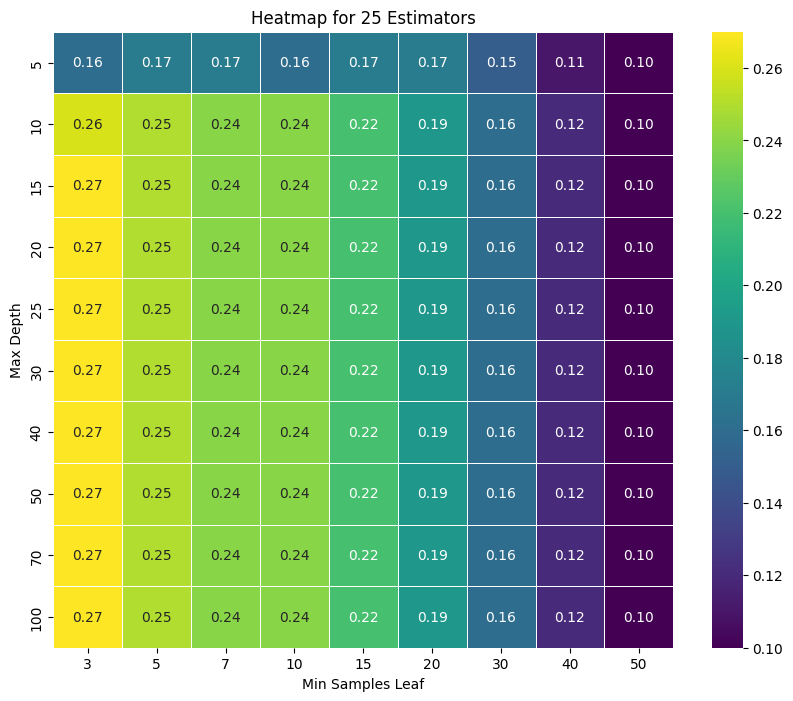

<ipython-input-39-f6a25c5ebfaa>:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")
<ipython-input-39-f6a25c5ebfaa>:21: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")
<ipython-input-39-f6a25c5ebfaa>:21: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")


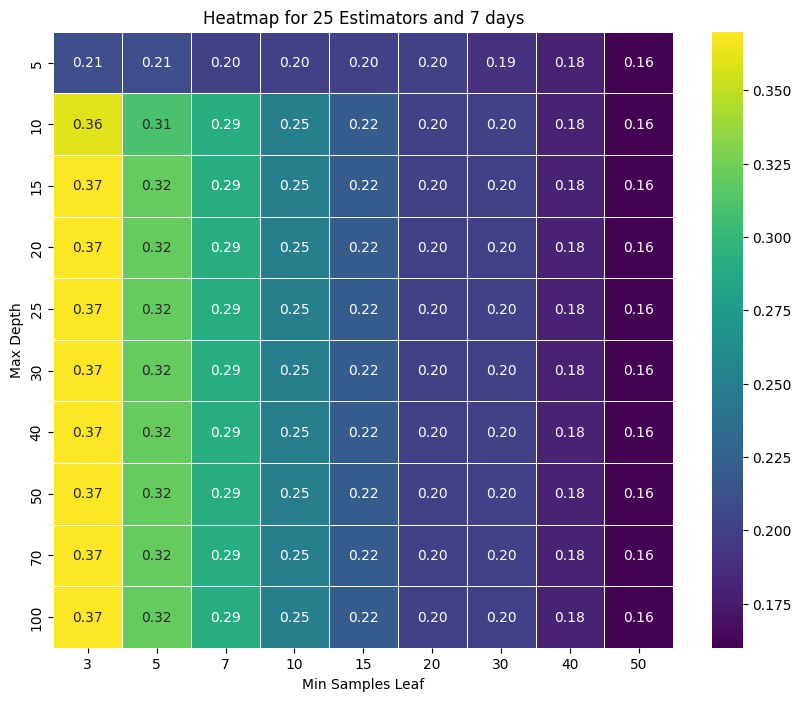

In [ ]:

    # Filter DataFrame for the specific n_estimator
plt.figure(figsize=(10, 8))
est = 25
filtered_results = results[results['n_estimators'] == est]

# Pivot the DataFrame for heatmap
heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")

# Create a heatmap
sns.heatmap(heatmap_data, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
plt.title(f"Heatmap for {est} Estimators")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Max Depth")


plt.show()

plt.figure(figsize=(10, 8))

# Pivot the DataFrame for heatmap
heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")

# Create a heatmap
sns.heatmap(heatmap_data, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
plt.title(f"Heatmap for {est} Estimators and 7 days")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Max Depth")


plt.show()


<ipython-input-40-c0678de3afaf>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")
<ipython-input-40-c0678de3afaf>:7: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")
<ipython-input-40-c0678de3afaf>:7: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")


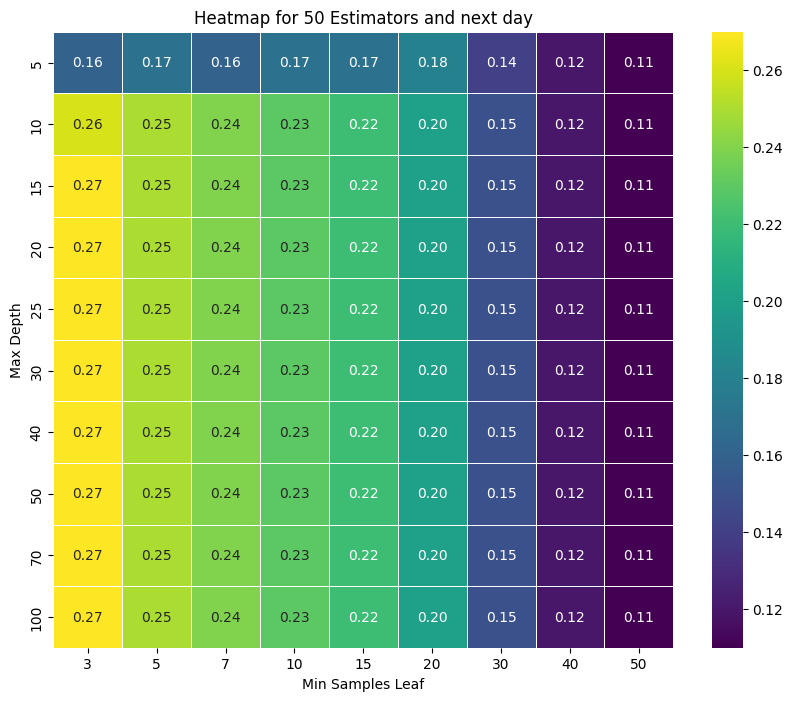

<ipython-input-40-c0678de3afaf>:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")
<ipython-input-40-c0678de3afaf>:21: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")
<ipython-input-40-c0678de3afaf>:21: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")


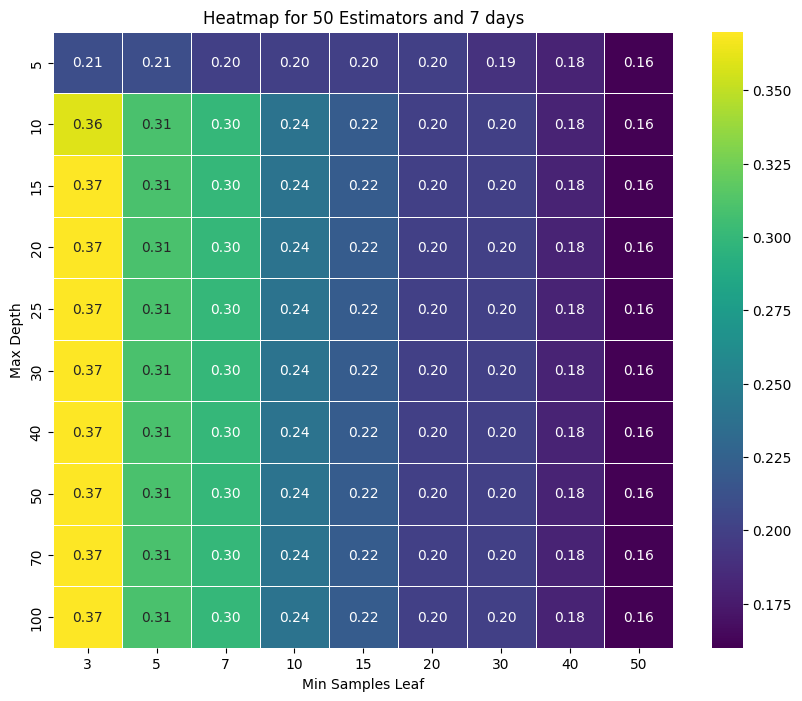

In [ ]:

# Filter DataFrame for the specific n_estimator
plt.figure(figsize=(10, 8))
est = 50
filtered_results = results[results['n_estimators'] == est]

# Pivot the DataFrame for heatmap
heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")

# Create a heatmap
sns.heatmap(heatmap_data, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
plt.title(f"Heatmap for {est} Estimators and next day")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Max Depth")


plt.show()

plt.figure(figsize=(10, 8))

# Pivot the DataFrame for heatmap
heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")

# Create a heatmap
sns.heatmap(heatmap_data, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
plt.title(f"Heatmap for {est} Estimators and 7 days")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Max Depth")


plt.show()


<ipython-input-41-aac3570fbd3c>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")
<ipython-input-41-aac3570fbd3c>:7: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")
<ipython-input-41-aac3570fbd3c>:7: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")


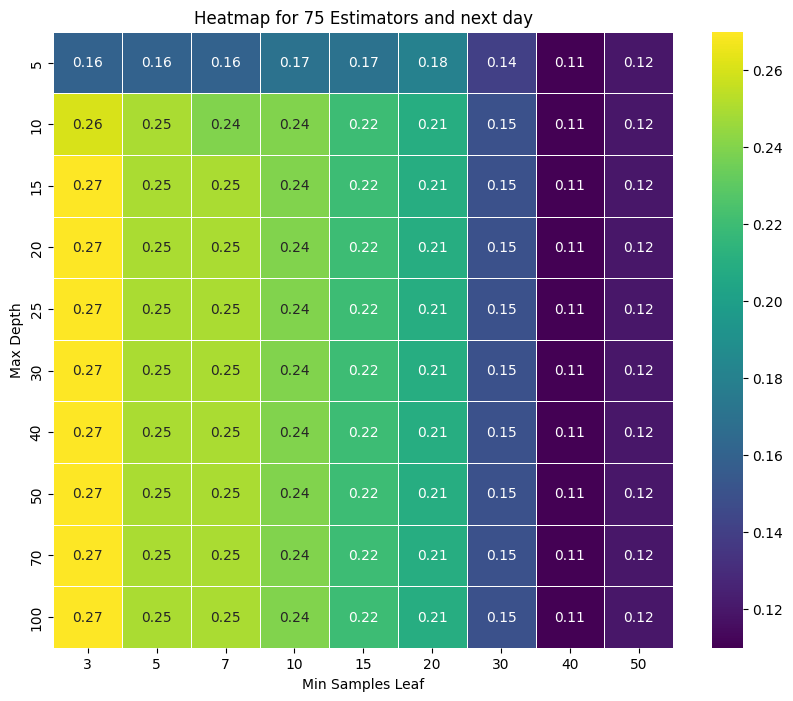

<ipython-input-41-aac3570fbd3c>:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")
<ipython-input-41-aac3570fbd3c>:21: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")
<ipython-input-41-aac3570fbd3c>:21: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")


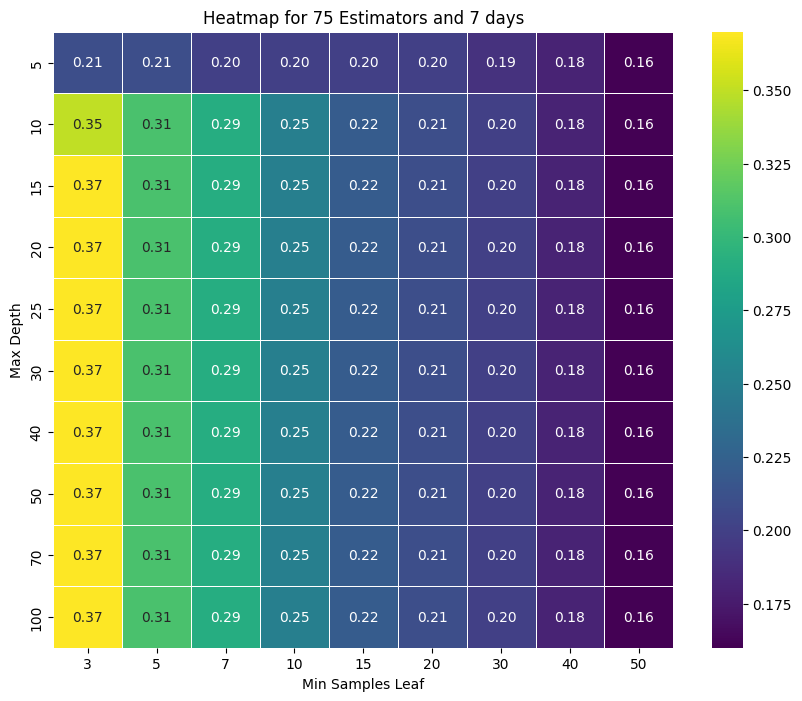

In [ ]:
# Filter DataFrame for the specific n_estimator
plt.figure(figsize=(10, 8))
est = 75
filtered_results = results[results['n_estimators'] == 75]

# Pivot the DataFrame for heatmap
heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")

# Create a heatmap
sns.heatmap(heatmap_data, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
plt.title(f"Heatmap for {est} Estimators and next day")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Max Depth")


plt.show()

plt.figure(figsize=(10, 8))

# Pivot the DataFrame for heatmap
heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")

# Create a heatmap
sns.heatmap(heatmap_data, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
plt.title(f"Heatmap for {est} Estimators and 7 days")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Max Depth")


plt.show()

<ipython-input-42-83efe6922566>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")
<ipython-input-42-83efe6922566>:7: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")
<ipython-input-42-83efe6922566>:7: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")


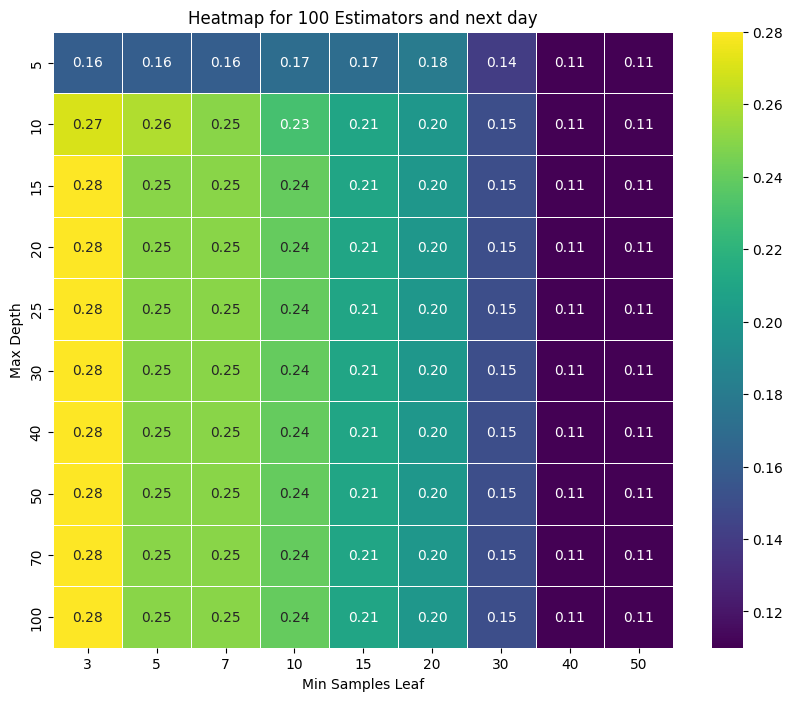

<ipython-input-42-83efe6922566>:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")
<ipython-input-42-83efe6922566>:21: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")
<ipython-input-42-83efe6922566>:21: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")


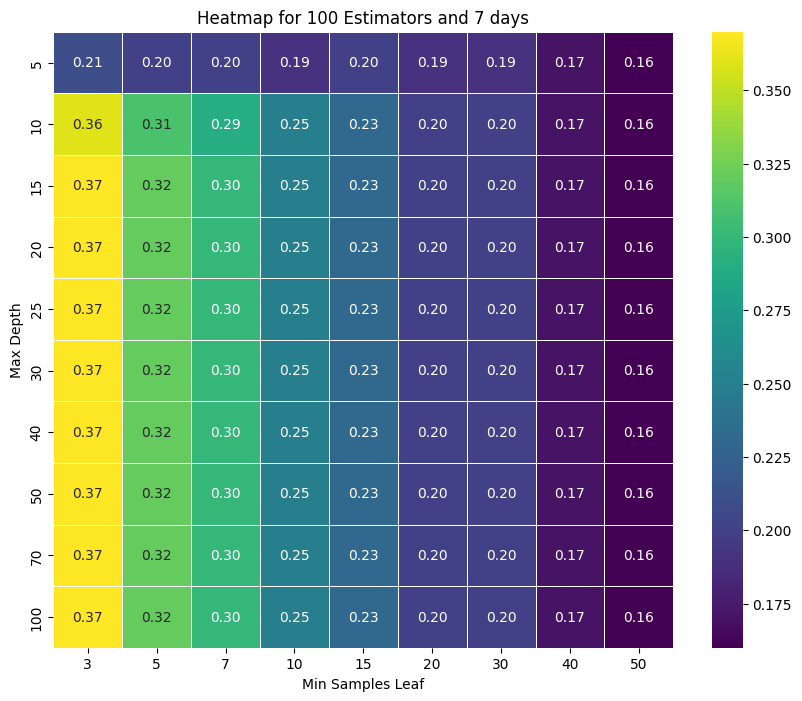

In [ ]:
# Filter DataFrame for the specific n_estimator
plt.figure(figsize=(10, 8))
est = 100
filtered_results = results[results['n_estimators'] == est]

# Pivot the DataFrame for heatmap
heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")

# Create a heatmap
sns.heatmap(heatmap_data, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
plt.title(f"Heatmap for {est} Estimators and next day")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Max Depth")


plt.show()

plt.figure(figsize=(10, 8))

# Pivot the DataFrame for heatmap
heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")

# Create a heatmap
sns.heatmap(heatmap_data, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
plt.title(f"Heatmap for {est} Estimators and 7 days")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Max Depth")


plt.show()

<ipython-input-43-7bbef73c8947>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")
<ipython-input-43-7bbef73c8947>:7: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")
<ipython-input-43-7bbef73c8947>:7: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")


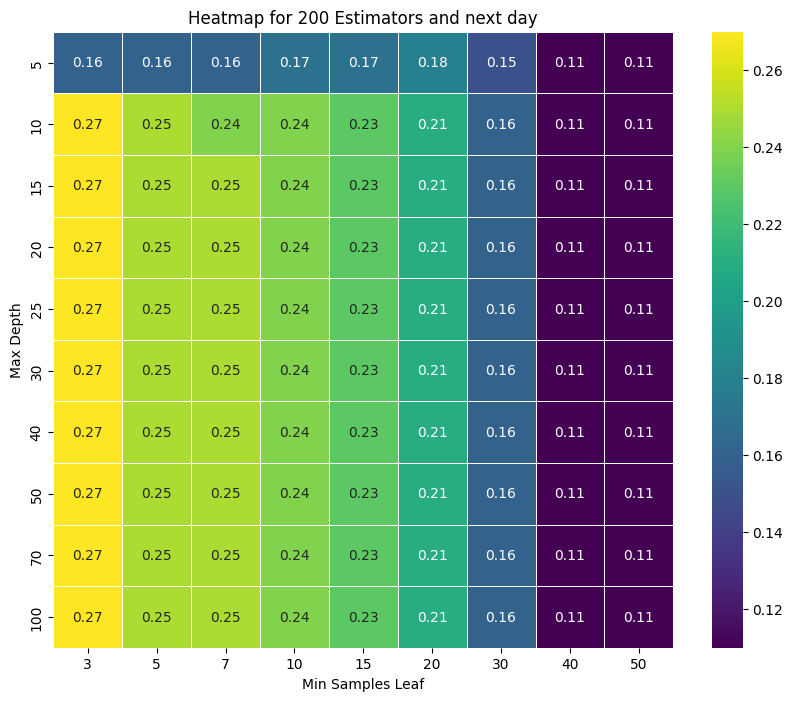

<ipython-input-43-7bbef73c8947>:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")
<ipython-input-43-7bbef73c8947>:21: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")
<ipython-input-43-7bbef73c8947>:21: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")


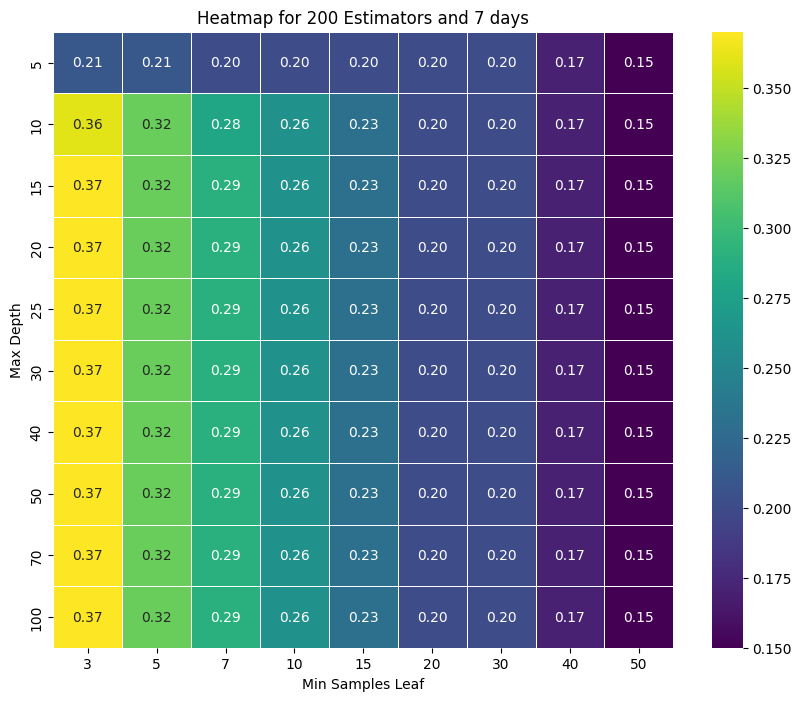

In [ ]:
# Filter DataFrame for the specific n_estimator
plt.figure(figsize=(10, 8))
est = 200
filtered_results = results[results['n_estimators'] == est]

# Pivot the DataFrame for heatmap
heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")

# Create a heatmap
sns.heatmap(heatmap_data, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
plt.title(f"Heatmap for {est} Estimators and next day")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Max Depth")


plt.show()

plt.figure(figsize=(10, 8))

# Pivot the DataFrame for heatmap
heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")

# Create a heatmap
sns.heatmap(heatmap_data, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
plt.title(f"Heatmap for {est} Estimators and 7 days")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Max Depth")


plt.show()

<ipython-input-44-18d8700a100c>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")
<ipython-input-44-18d8700a100c>:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")
<ipython-input-44-18d8700a100c>:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")


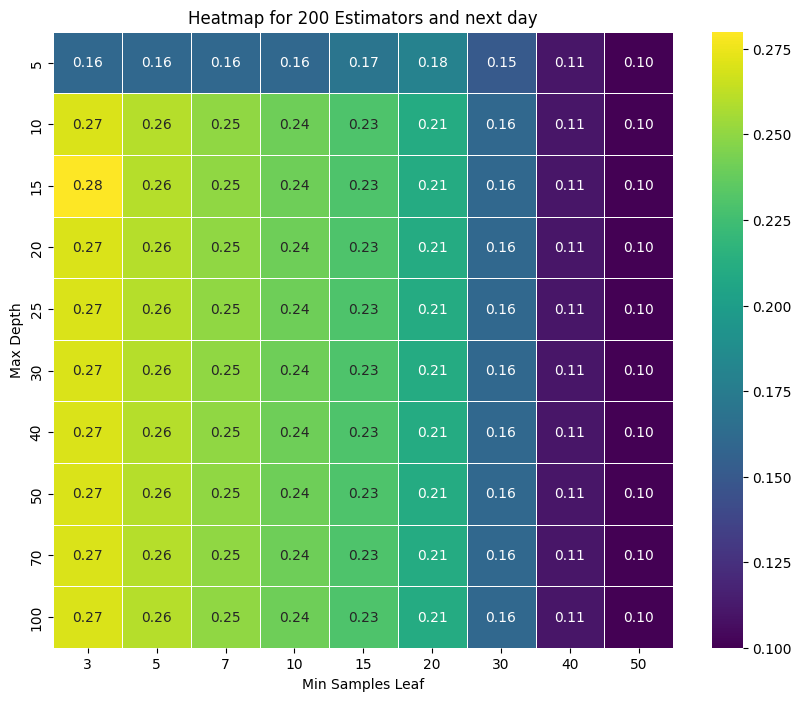

<ipython-input-44-18d8700a100c>:19: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")
<ipython-input-44-18d8700a100c>:19: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")
<ipython-input-44-18d8700a100c>:19: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")


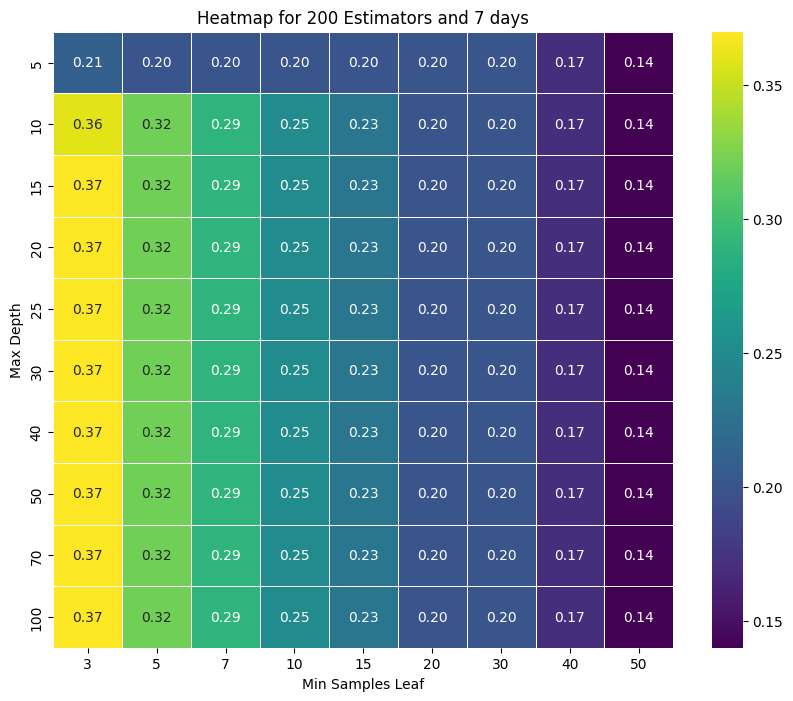

In [ ]:
# Filter DataFrame for the specific n_estimator
plt.figure(figsize=(10, 8))
filtered_results = results[results['n_estimators'] == 400]

# Pivot the DataFrame for heatmap
heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")

# Create a heatmap
sns.heatmap(heatmap_data, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
plt.title(f"Heatmap for {est} Estimators and next day")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Max Depth")


plt.show()

plt.figure(figsize=(10, 8))
# Pivot the DataFrame for heatmap
heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")

# Create a heatmap
sns.heatmap(heatmap_data, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
plt.title(f"Heatmap for {est} Estimators and 7 days")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Max Depth")


plt.show()

In [ ]:
best_results = results.loc[(results['max_depth']==15) & (results['min_samples_leaf']==3) & (results['n_estimators'] == 25)]
best_results

,n_estimators,max_depth,min_samples_leaf,rsme,acceptable_ratio_1d,acceptable_weighted_ratio_1d,acceptable_ratio_7d,acceptable_weighted_ratio_7d
18,25,15,3,1147.583921,0.39,0.27,0.51,0.37


In [ ]:
new_row = ["Regression Forest", best_results["rsme"].values[0], best_results["acceptable_weighted_ratio_1d"].values[0], best_results["acceptable_weighted_ratio_7d"].values[0]]
new_row_df = pd.DataFrame([new_row], columns=models_results.columns)

models_results = pd.concat([models_results, new_row_df], ignore_index=True)

In [ ]:
models_results

,model_tested,rsme,acceptable_weighted_ratio_1d,acceptable_weighted_ratio_7d
0,Regression Tree,1424.267595,0.20,0.35
1,Regression Forest,1147.583921,0.27,0.37




```
# Isto está formatado como código
```

## *Gradient Boosting Regressor Model*
For this section instead of using XGBRegressor from XGboost, I will use the equivalent solution included in sklearn library

In [ ]:
def regressor_gb_trainer(X_train, y_train, max_depth, min_samples_leaf, n_estimators=50):
    gb_regressor = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=0.1, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
    gb_regressor.fit(X_train, y_train)
    return gb_regressor

In [ ]:
deeps=[5,10,15,20,25,30,40,50,70,100]
samples_leaf=[1,4,7,10,15,20,30,40,50]
estimators = [25, 50, 75, 100, 200, 400]
result_columns = ["n_estimators", "max_depth", "min_samples_leaf","rsme", "acceptable_ratio_1d", "acceptable_weighted_ratio_1d", "acceptable_ratio_7d", "acceptable_weighted_ratio_7d" ]
results = pd.DataFrame(columns=result_columns)
for n_estimators in estimators:
  for max_depth in deeps:
    for min_samples_leaf in samples_leaf:
      y_train_1d = dfy_train['next_day_value']
      model_1d = regressor_gb_trainer(dfX_train, y_train_1d, max_depth, min_samples_leaf, n_estimators)
      y_eval_pred_1d = model_1d.predict(dfX_eval)
      rsme_1d = mean_squared_error(dfy_eval["next_day_value"], y_eval_pred_1d, squared=False)
      #print (f"For a max_depth of {max_depth} and a min_samples_leaf of {min_samples_leaf}, the 1 Day Prediction Ratios are:")
      errors_1d, acceptable_ratio_1d, acceptable_weighted_ratio_1d = model_evaluator(dfy_eval["next_day_value"], y_eval_pred_1d, "one_value", aceptable_error=1.5)

      y_train_7d = dfy_train['next_week_value']
      model_7d = regressor_gb_trainer(dfX_train, y_train_7d, max_depth, min_samples_leaf, n_estimators)
      y_eval_pred_7d = model_7d.predict(dfX_eval)
      rsme_7d = mean_squared_error(dfy_eval["next_week_value"], y_eval_pred_7d, squared=False)
      #print (f"For a max_depth of {max_depth} and a min_samples_leaf of {min_samples_leaf}, the 7 Day Prediction Ratios are:")
      errors_7d, acceptable_ratio_7d, acceptable_weighted_ratio_7d = model_evaluator(dfy_eval["next_week_value"], y_eval_pred_7d, "one_value", aceptable_error=3)

      new_row = [n_estimators, max_depth , min_samples_leaf, rsme, acceptable_ratio_1d, acceptable_weighted_ratio_1d, acceptable_ratio_7d, acceptable_weighted_ratio_7d]
      new_row_df = pd.DataFrame([new_row], columns=results.columns)

      results = pd.concat([results, new_row_df], ignore_index=True)

<ipython-input-50-c09cdaf78296>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")
<ipython-input-50-c09cdaf78296>:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")
<ipython-input-50-c09cdaf78296>:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")


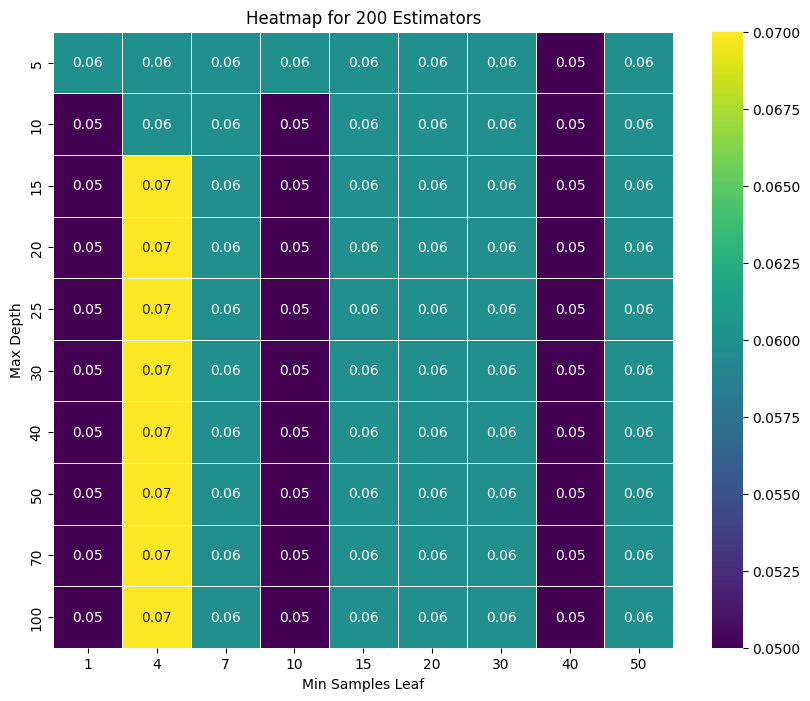

<ipython-input-50-c09cdaf78296>:19: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")
<ipython-input-50-c09cdaf78296>:19: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")
<ipython-input-50-c09cdaf78296>:19: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")


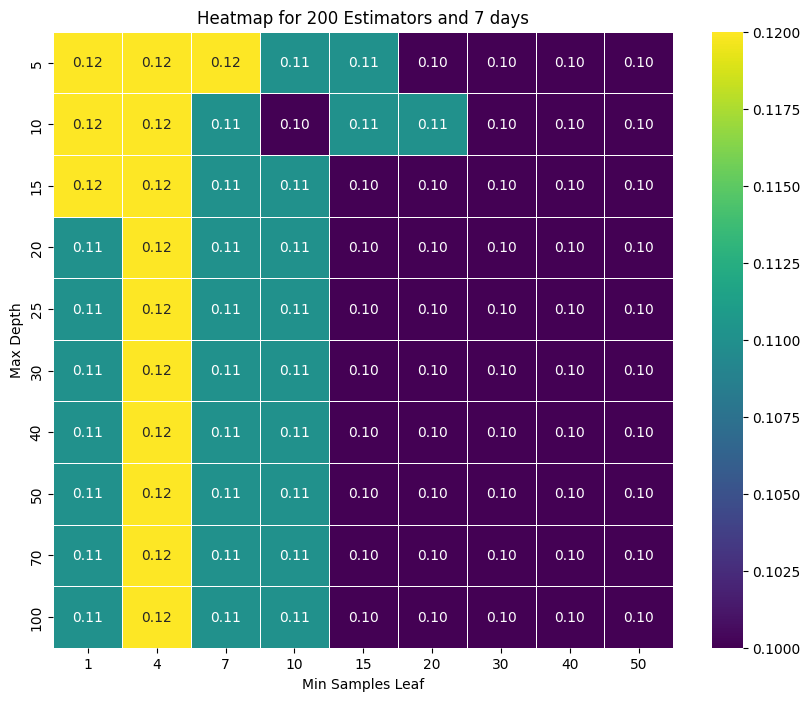

In [ ]:
plt.figure(figsize=(10, 8))
filtered_results = results[results['n_estimators'] == 25]

# Pivot the DataFrame for heatmap
heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")

# Create a heatmap
sns.heatmap(heatmap_data, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
plt.title(f"Heatmap for {est} Estimators")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Max Depth")


plt.show()

plt.figure(figsize=(10, 8))

# Pivot the DataFrame for heatmap
heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")

# Create a heatmap
sns.heatmap(heatmap_data, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
plt.title(f"Heatmap for {est} Estimators and 7 days")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Max Depth")


plt.show()

<ipython-input-51-3ebc798ab28d>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")
<ipython-input-51-3ebc798ab28d>:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")
<ipython-input-51-3ebc798ab28d>:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")


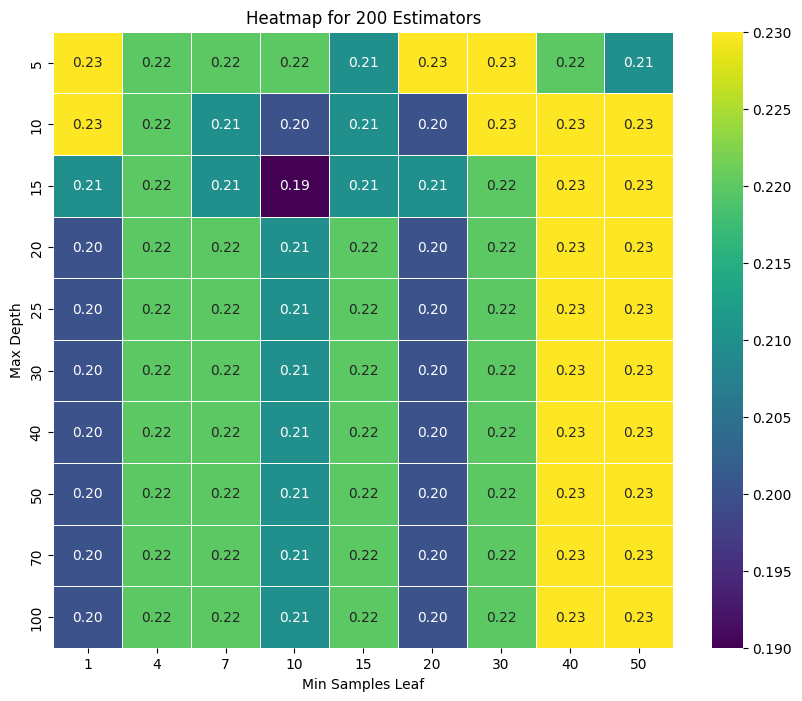

<ipython-input-51-3ebc798ab28d>:19: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")
<ipython-input-51-3ebc798ab28d>:19: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")
<ipython-input-51-3ebc798ab28d>:19: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")


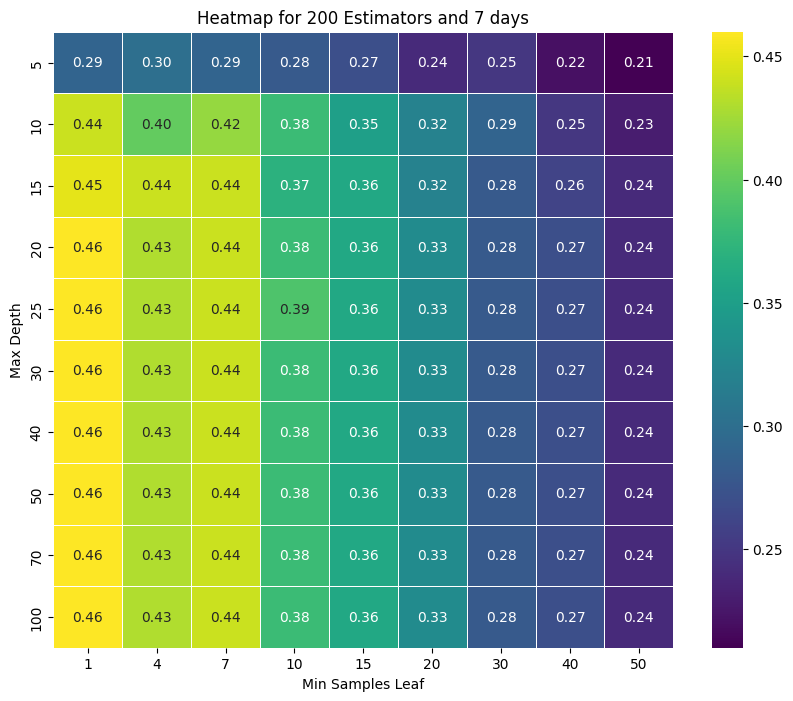

In [ ]:
plt.figure(figsize=(10, 8))
filtered_results = results[results['n_estimators'] == 50]

# Pivot the DataFrame for heatmap
heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")

# Create a heatmap
sns.heatmap(heatmap_data, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
plt.title(f"Heatmap for {est} Estimators")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Max Depth")


plt.show()

plt.figure(figsize=(10, 8))

# Pivot the DataFrame for heatmap
heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")

# Create a heatmap
sns.heatmap(heatmap_data, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
plt.title(f"Heatmap for {est} Estimators and 7 days")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Max Depth")


plt.show()

<ipython-input-52-593acbcfd54f>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")
<ipython-input-52-593acbcfd54f>:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")
<ipython-input-52-593acbcfd54f>:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")


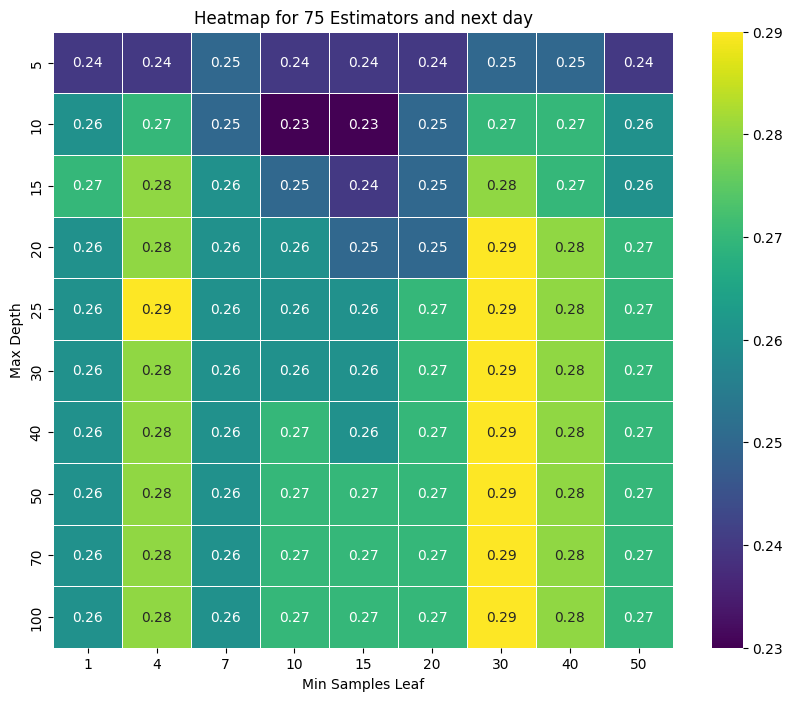

<ipython-input-52-593acbcfd54f>:20: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")
<ipython-input-52-593acbcfd54f>:20: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")
<ipython-input-52-593acbcfd54f>:20: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")


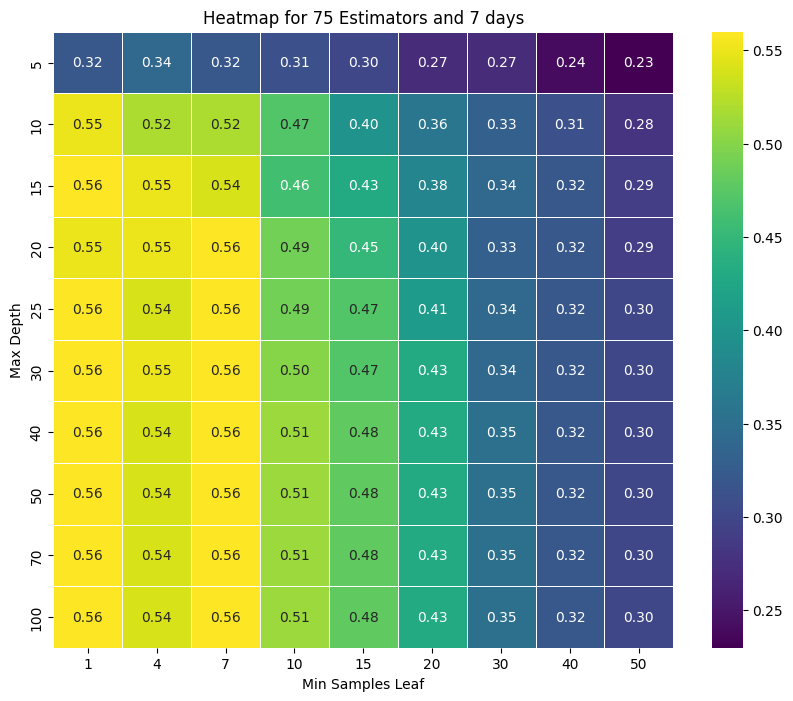

In [ ]:
plt.figure(figsize=(10, 8))
est = 75
filtered_results = results[results['n_estimators'] == est]

# Pivot the DataFrame for heatmap
heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")

# Create a heatmap
sns.heatmap(heatmap_data, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
plt.title(f"Heatmap for {est} Estimators and next day")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Max Depth")


plt.show()

plt.figure(figsize=(10, 8))

# Pivot the DataFrame for heatmap
heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")

# Create a heatmap
sns.heatmap(heatmap_data, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
plt.title(f"Heatmap for {est} Estimators and 7 days")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Max Depth")


plt.show()

<ipython-input-53-ca983ca8c4f3>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")
<ipython-input-53-ca983ca8c4f3>:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")
<ipython-input-53-ca983ca8c4f3>:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")


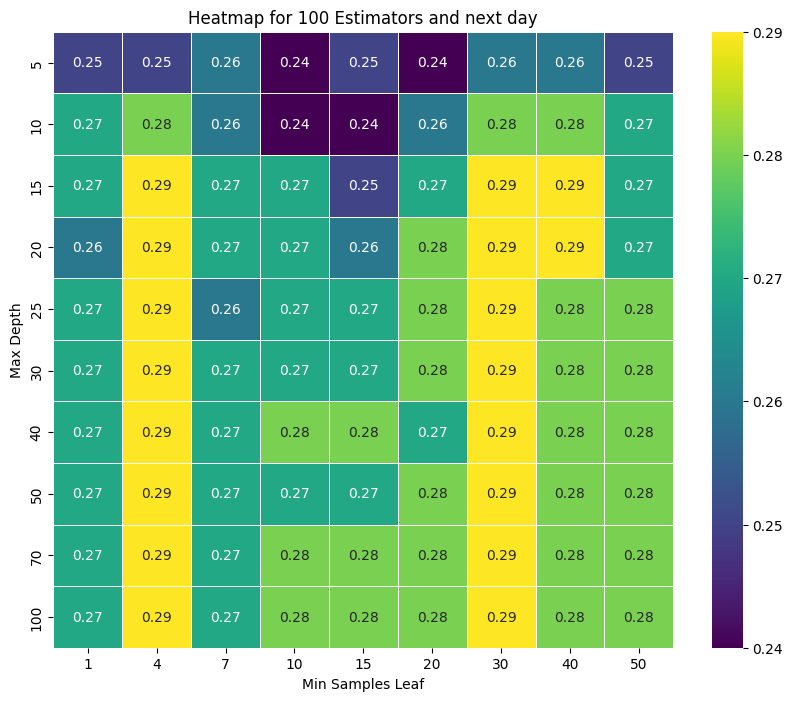

<ipython-input-53-ca983ca8c4f3>:20: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")
<ipython-input-53-ca983ca8c4f3>:20: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")
<ipython-input-53-ca983ca8c4f3>:20: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")


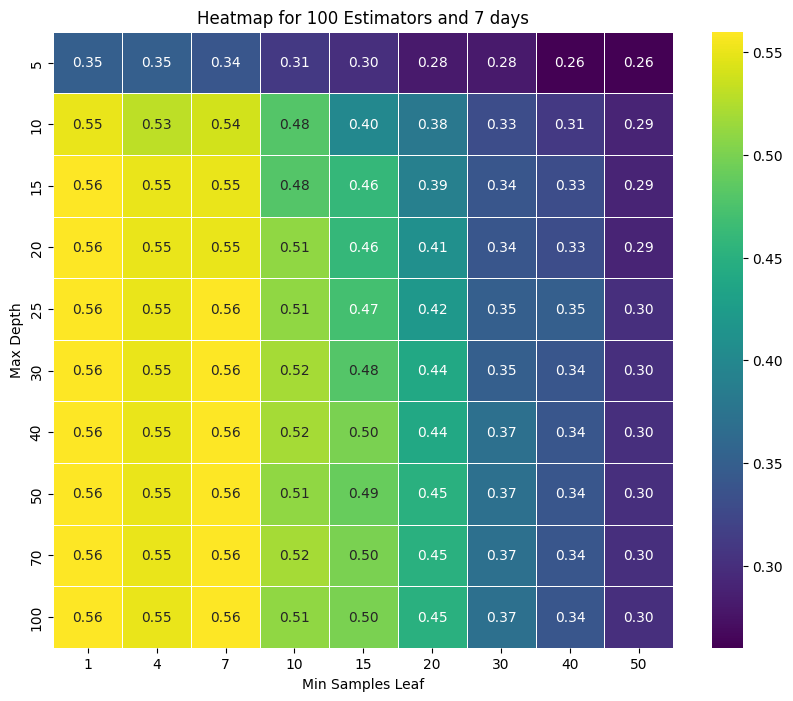

In [ ]:
plt.figure(figsize=(10, 8))
est = 100
filtered_results = results[results['n_estimators'] == est]

# Pivot the DataFrame for heatmap
heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")

# Create a heatmap
sns.heatmap(heatmap_data, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
plt.title(f"Heatmap for {est} Estimators and next day")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Max Depth")


plt.show()

plt.figure(figsize=(10, 8))

# Pivot the DataFrame for heatmap
heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")

# Create a heatmap
sns.heatmap(heatmap_data, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
plt.title(f"Heatmap for {est} Estimators and 7 days")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Max Depth")


plt.show()

<ipython-input-54-a1fa20fa11dc>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")
<ipython-input-54-a1fa20fa11dc>:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")
<ipython-input-54-a1fa20fa11dc>:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")


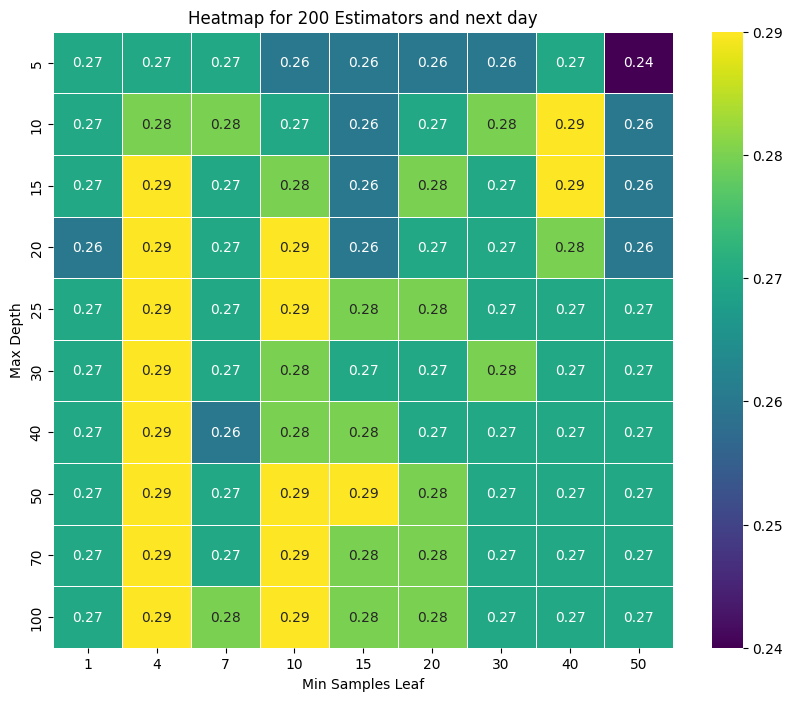

<ipython-input-54-a1fa20fa11dc>:20: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")
<ipython-input-54-a1fa20fa11dc>:20: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")
<ipython-input-54-a1fa20fa11dc>:20: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")


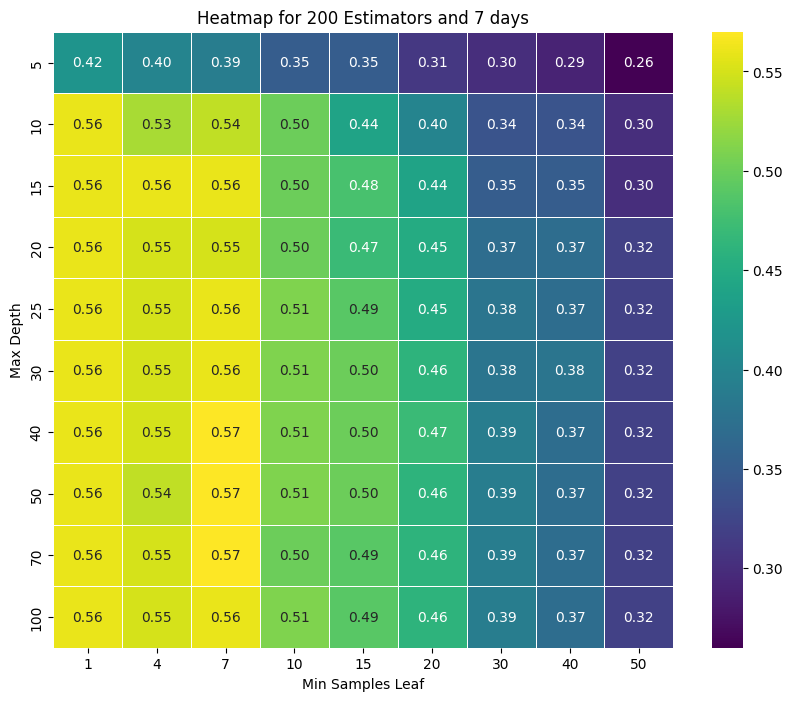

In [ ]:
plt.figure(figsize=(10, 8))
est = 200
filtered_results = results[results['n_estimators'] == est]

# Pivot the DataFrame for heatmap
heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")

# Create a heatmap
sns.heatmap(heatmap_data, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
plt.title(f"Heatmap for {est} Estimators and next day")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Max Depth")


plt.show()

plt.figure(figsize=(10, 8))

# Pivot the DataFrame for heatmap
heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")

# Create a heatmap
sns.heatmap(heatmap_data, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
plt.title(f"Heatmap for {est} Estimators and 7 days")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Max Depth")


plt.show()

<ipython-input-55-827c5a02faac>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")
<ipython-input-55-827c5a02faac>:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")
<ipython-input-55-827c5a02faac>:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")


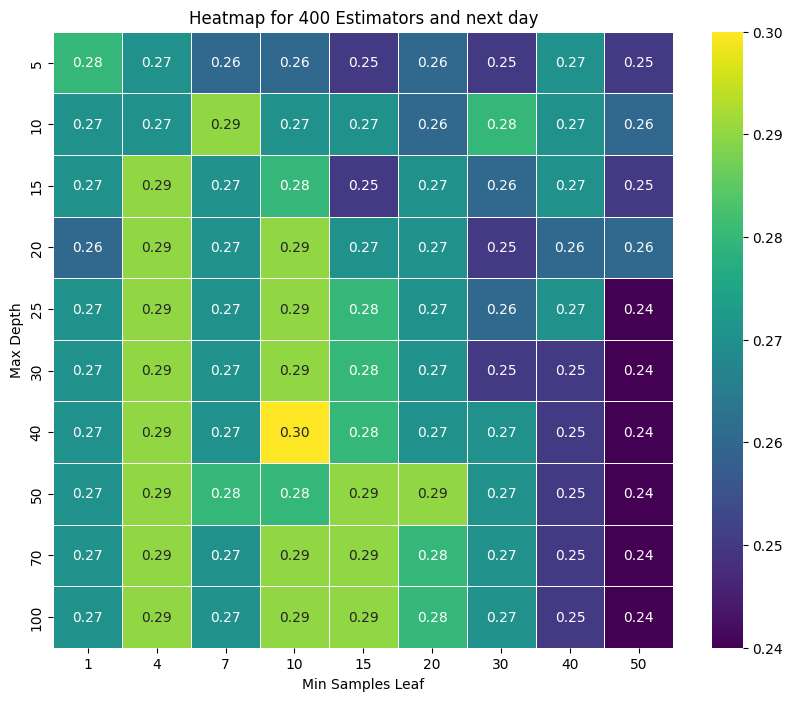

<ipython-input-55-827c5a02faac>:20: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")
<ipython-input-55-827c5a02faac>:20: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")
<ipython-input-55-827c5a02faac>:20: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")


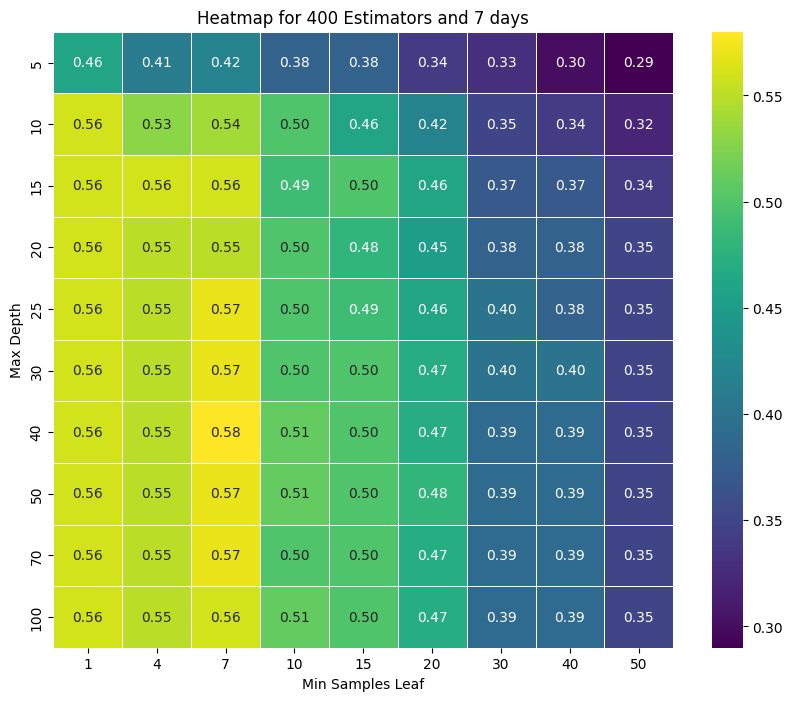

In [ ]:
plt.figure(figsize=(10, 8))
est = 400
filtered_results = results[results['n_estimators'] == est]

# Pivot the DataFrame for heatmap
heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_1d")

# Create a heatmap
sns.heatmap(heatmap_data, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
plt.title(f"Heatmap for {est} Estimators and next day")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Max Depth")


plt.show()

plt.figure(figsize=(10, 8))

# Pivot the DataFrame for heatmap
heatmap_data = filtered_results.pivot("max_depth", "min_samples_leaf", "acceptable_weighted_ratio_7d")

# Create a heatmap
sns.heatmap(heatmap_data, annot=True, cmap="viridis", fmt=".2f", linewidths=.5)
plt.title(f"Heatmap for {est} Estimators and 7 days")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Max Depth")


plt.show()

In [ ]:
max_depth = 15
min_samples_leaf = 1
n_estimators = 400
y_train_1d = dfy_train['next_day_value']
model_1d = regressor_gb_trainer(dfX_train, y_train_1d, max_depth, min_samples_leaf, n_estimators=200)
y_eval_pred_1d = model_1d.predict(dfX_eval)
rsme_1d = mean_squared_error(dfy_eval["next_day_value"], y_eval_pred_1d, squared=False)
errors_1d, acceptable_ratio_1d, acceptable_weighted_ratio_1d = model_evaluator(dfy_eval["next_day_value"], y_eval_pred_1d, "one_value", aceptable_error=1.5)
print (f"For a max_depth of {max_depth} and a min_samples_leaf of {min_samples_leaf}, the 1 Day Prediction Ratios are:")
print (f"acceptable_ratio_1d: {acceptable_ratio_1d} ")
print (f"acceptable_weighted_ratio_1d: {acceptable_weighted_ratio_1d} ")


y_train_7d = dfy_train['next_week_value']
model_7d = regressor_gb_trainer(dfX_train, y_train_7d, max_depth, min_samples_leaf, n_estimators=200)
y_eval_pred_7d = model_7d.predict(dfX_eval)
rsme_7d = mean_squared_error(dfy_eval["next_week_value"], y_eval_pred_7d, squared=False)
errors_7d, acceptable_ratio_7d, acceptable_weighted_ratio_7d = model_evaluator(dfy_eval["next_week_value"], y_eval_pred_7d, "one_value", aceptable_error=3)
print (f"For a max_depth of {max_depth} and a min_samples_leaf of {min_samples_leaf}, the 7 Day Prediction Ratios are:")
print (f"acceptable_ratio_7d: {acceptable_ratio_7d} ")
print (f"acceptable_weighted_ratio_7d: {acceptable_weighted_ratio_7d} ")


new_row = [n_estimators, max_depth , min_samples_leaf, rsme, acceptable_ratio_1d, acceptable_weighted_ratio_1d, acceptable_ratio_7d, acceptable_weighted_ratio_7d]
new_row_df = pd.DataFrame([new_row], columns=results.columns)

results = pd.concat([results, new_row_df], ignore_index=True)


For a max_depth of 15 and a min_samples_leaf of 1, the 1 Day Prediction Ratios are:
acceptable_ratio_1d: 0.4 
acceptable_weighted_ratio_1d: 0.27 
For a max_depth of 15 and a min_samples_leaf of 1, the 7 Day Prediction Ratios are:
acceptable_ratio_7d: 0.66 
acceptable_weighted_ratio_7d: 0.56 


In [ ]:
results.loc[(results["n_estimators"]==400) & (results["min_samples_leaf"]==15)]

,n_estimators,max_depth,min_samples_leaf,rsme,acceptable_ratio_1d,acceptable_weighted_ratio_1d,acceptable_ratio_7d,acceptable_weighted_ratio_7d
454,400,5,15,1748.503188,0.37,0.25,0.51,0.38
463,400,10,15,1748.503188,0.39,0.27,0.58,0.46
472,400,15,15,1748.503188,0.37,0.25,0.62,0.50
481,400,20,15,1748.503188,0.38,0.27,0.59,0.48
490,400,25,15,1748.503188,0.40,0.28,0.61,0.49
499,400,30,15,1748.503188,0.39,0.28,0.61,0.50
508,400,40,15,1748.503188,0.40,0.28,0.61,0.50
517,400,50,15,1748.503188,0.41,0.29,0.61,0.50
526,400,70,15,1748.503188,0.41,0.29,0.61,0.50
535,400,100,15,1748.503188,0.41,0.29,0.61,0.50


The best resuls for 1 day were acchieved with the following parameters:
* Number of stimators: 400
* Max depth: 40
* Min sample leaf: 15

The best resuls for 1 day were acchieved with the following parameters:
* Number of stimators: 400
* Max depth: 40
* Min sample leaf: 7

